## Segunda parte

#### Paradoja del falso positivo

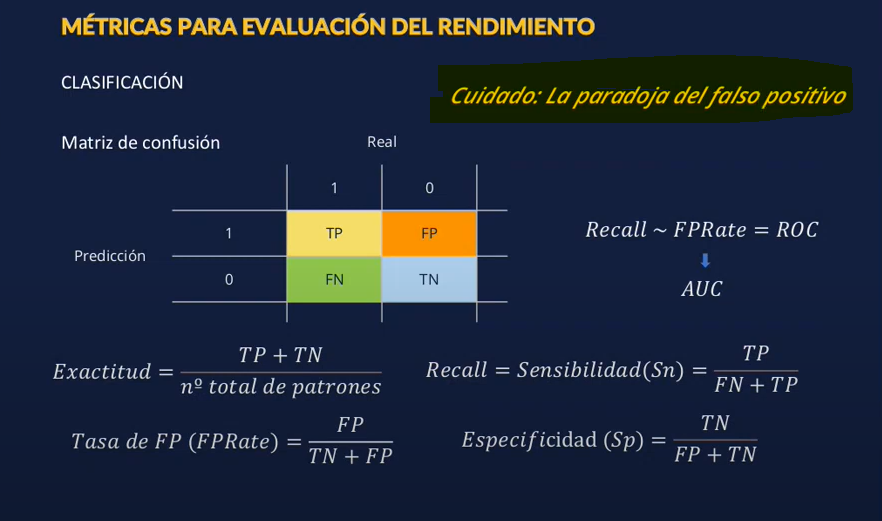

In [1]:
from IPython.display import Image
Image(filename='img/5.PNG') 

Tengo un problema de clasificacion de bolitas negras y bolitas blancas

Tengo 9 pelotas blancas y una negra

Este modelo de ML si no sabe que bolita es simpre la claisfica como blanca



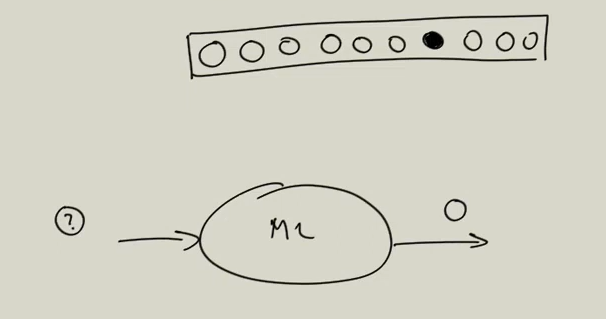

In [2]:
from IPython.display import Image
Image(filename='img/6.PNG') 

**Que rendimiento va a tenr el modelo de machine learning?**

Si el modelo de machine learning siempre te predice como **blancas** las bolitas que no conoce, tendremos un rendimiento muy alto del modelo

Pero es un mañ classificador porque no esta acertando un alto número de bolitas pero igual las clasifica como blancas.


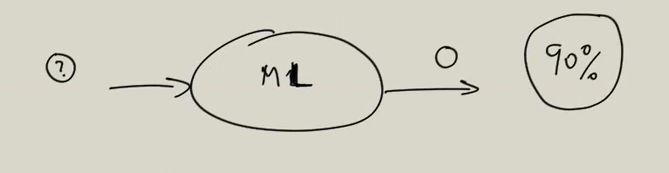

In [4]:
from IPython.display import Image
Image(filename='img/7.PNG') 

Esto es igual a que si tenemos un donctor que no importa como lleguen las personas a consulta , simpre las classifica como sanas.

Habrá un número mayor de personas sanas pero la realidad es otra.

**Donde está el error??**

Se está utilizando la exactitud (accuracy) para evaluar un modelo de classificacion donde es una situacion de desequilibrio

ENtonces el ACC no es la mejor de las metricas para abordar situaciones donde hay **desquilibrio de clases**

ACC -> Acertados divididos entre el total


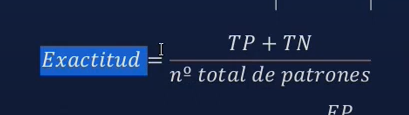

In [6]:
from IPython.display import Image
Image(filename='img/8.PNG') 

Esto es como si valoraramos un Trailer por su velocidad. EN realidad lo deberiamos valorar por su capacidad de carga, petencia.

Es lo mismo , es valorar con una metrica que realmente no dice nada cuando hay situaciones de desequilibrio.

Habría que utilizar otrar metricas que tomen encuenta el desquilibrio.

Como lo vimos en la **CLASE2** lo primero que debo hacer cuando trabajo un datset es fijarme que todas la clases esten equilibradas.

Si tenemos desequilibrio el **ACCURACY** no es una buena metrica para evaluar rendimeinto.

Para ello tenemos otras métricas:
    - Sensibilidad  ---- Capacidad del modelo para detectar patrones de la clase positiva
    - Especificidad ---- Capacidad de acertar patrones de la la clase negra

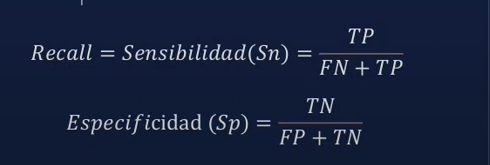

In [7]:
from IPython.display import Image
Image(filename='img/9.PNG') 

La mayorá de problemas del mundo real tienen **DESEQUILIBRIO**

Entonces lo primero que tenemos que hacer con un proyecto de Machine Learning en ver el equilibrio de clases.

Si tienen desequilibrio **NO** podemos utilizar el Accuracy

En estos casos es mejor utilizar el b**Balanced_accuracy** or el **AUC** que son más precisso

### Como implementemos esto es una estrategia de ML?

POr ejemplo utilizamos de nuevo la tecnica de K-FOLD

In [12]:
## Son los mismos imports de arriba más éste
from sklearn.model_selection import KFold

## Son los mismos imports de arriba más éste
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from pandas import read_csv 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import random
import pandas

data = read_csv('indian_liver_patient.csv')

#MIssing values
data.fillna(0,inplace=True)

In [13]:
X = data[data.columns[:-1]]
X = pandas.get_dummies(X, prefix=['gen'])
Y = data['Dataset']

In [14]:
# Definimos el número de particiones
k = 10
seed = random.randint(0,10)

In [15]:
kfold = KFold(n_splits=k, random_state=seed, shuffle= True)

In [16]:
model = KNeighborsClassifier()

**AQUI** es donde escogemos que **metrica** utilizar una vez medido el equilibrio de clases

En el parametro**score** indicamos el tipo de metrica
- accuracy
-roc_auc (area under Curve Roc) Basado en la Sensibilidad y especificidad 
-balanced_acc

En la documentacion de Scaler estan todas la metricas disponibles.

In [19]:
res = cross_val_score(model,X,Y,cv=kfold, scoring='roc_auc')

## Aqui muestro la MEDIA y la DESVIACION STD para registrar el rendimiento de estemodelo
print("Acc: %.3f+/.%.3f"% (res.mean(),res.std()))

Acc: 0.684+/.0.044
